# Telecom Customer Churn Prediction Model

__What is Churn?__

_Customer churn is said to be happened when a customer stops using any business services or stops doing business with anyone.
This model will help you to predict customer churn on the basis of some variables and it will help you to focus on factors which stops this churn._

# Importing required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import LinearSVC,SVC
%matplotlib inline

In [2]:
data=pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,NaN,84.8,NaN,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,NaN,103.2,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,NaN,29.6,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes


# Knowing dimensions of your data

In [4]:
print('Number of Records',data.shape[0])
print('Number of Features',data.shape[1])


Number of Records 7043
Number of Features 21


In [5]:
print('what Features we have in the data \n',data.columns)

what Features we have in the data 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
#checking data type of columns
data.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges       object
TotalCharges         object
Churn                object
dtype: object

# Working with missing values

In [7]:
#lets check if missing values are there in the data

data.isnull().sum()

customerID           0
gender               0
SeniorCitizen       11
Partner              0
Dependents           0
tenure              91
PhoneService         0
MultipleLines       35
InternetService     28
OnlineSecurity      16
OnlineBackup         7
DeviceProtection    37
TechSupport         33
StreamingTV         10
StreamingMovies     13
Contract            28
PaperlessBilling     0
PaymentMethod        8
MonthlyCharges      76
TotalCharges        71
Churn                0
dtype: int64

From above output we can see that, we have missing values in our data

In [8]:
data.isnull().values.sum()

464

__There are 464 null values__ in the data which is __equivalent to 6.5% of total instances__. So, we can't just remove the entire row. we need to work on imputing these missing Values

___Imputing 'SeniorCitizen' Column___

In [9]:
data['SeniorCitizen']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: SeniorCitizen, Length: 7043, dtype: float64

__Column 'SeniorCitizen' has two values:__
1 -> SeniorCitizen
2 -> Not a SeniorCitizen

__Let's Map 1 to 'Yes' and 0 to 'No'__

In [10]:
data['SeniorCitizen'].replace(1.0,'Yes',inplace=True)

In [11]:
data['SeniorCitizen'].replace(0.0,'No',inplace=True)

In [12]:
data['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

In [13]:
data['SeniorCitizen'].value_counts()

No     5891
Yes    1141
Name: SeniorCitizen, dtype: int64

__Since it is a Categorical variable. we will replace null values with the entry which has maximum occurence.__

In [14]:
data['SeniorCitizen'].fillna('No', inplace=True)

In [15]:
data['SeniorCitizen'].value_counts()

No     5902
Yes    1141
Name: SeniorCitizen, dtype: int64

___Imputing 'Tenure' Column___

In [16]:
data['tenure'].isnull().sum()

91

Since it is a numeric type. we can replace missing values by Median or mean. Let's calculate mean and median of 'tenure'

In [17]:
mean_tenure=data['tenure'].mean()
print('mean of tenure',mean_tenure)
median_tenure=data['tenure'].median()
print('median of tenure',median_tenure)
print('min tenure',min(data['tenure']))
print('Max Tenure',max(data['tenure']))

mean of tenure 32.32853855005754
median of tenure 29.0
min tenure 0.0
Max Tenure 72.0


we can see from the above findings there are some outliers in our data. So, its better to replace missing values with median

In [18]:
data['tenure'].fillna(median_tenure,inplace=True)

In [19]:
data['tenure'].isnull().sum()

0

___Imputing "MultiLines"___

In [20]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes', nan], dtype=object)

In [21]:
data['MultipleLines'].value_counts()

No                  3374
Yes                 2953
No phone service     681
Name: MultipleLines, dtype: int64

If a customer doesn't have phone service then he/she shouldn't have multipleLines connection. so first we can replace 'No phone service' with 'No'

In [22]:
data['MultipleLines']=data['MultipleLines'].replace('No phone service','No')

In [23]:
data['MultipleLines'].value_counts()

No     4055
Yes    2953
Name: MultipleLines, dtype: int64

In [24]:
data['MultipleLines'].isnull().sum()

35

Replacing null values with 'No' 

In [25]:
data['MultipleLines'].fillna('No',inplace=True)

In [26]:
data['MultipleLines'].isnull().sum()

0

___We need to simply the data. If a customer doesn't have internet connection then those features which are depend on internet, they won't work. so we need to convert entry 'No Internet service' to 'No' in all those variables,___ 

In [27]:
Test=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in Test:
    data[i].replace('No internet service','No',inplace=True)

In [28]:
data['OnlineBackup'].value_counts()

No     4612
Yes    2424
Name: OnlineBackup, dtype: int64

___Imputing 'InternetService' Feature___

In [29]:
data['InternetService'].value_counts()

Fiber optic    3082
DSL            2411
No             1522
Name: InternetService, dtype: int64

In [30]:
data['InternetService'].isnull().sum()

28

In [31]:
data['InternetService'].fillna('Fiber optic',inplace=True)

In [32]:
data['InternetService'].isnull().sum()

0

__"OnlineSecurity"__

In [33]:
data["OnlineSecurity"].isnull().sum()

16

In [34]:
data['OnlineSecurity'].value_counts()

No     5012
Yes    2015
Name: OnlineSecurity, dtype: int64

In [35]:
data['OnlineSecurity'].fillna('No',inplace=True)

In [36]:
data["OnlineSecurity"].isnull().sum()

0

__"OnlineBackup"__

In [37]:
data["OnlineBackup"].isnull().sum()

7

In [38]:
data['OnlineBackup'].value_counts()

No     4612
Yes    2424
Name: OnlineBackup, dtype: int64

In [39]:
data['OnlineBackup'].fillna('No',inplace=True)

In [40]:
data['OnlineBackup'].isnull().sum()

0

__"DeviceProtection"__

In [41]:
data['DeviceProtection'].isnull().sum()

37

In [42]:
data['DeviceProtection'].value_counts()

No     4596
Yes    2410
Name: DeviceProtection, dtype: int64

In [43]:
data['DeviceProtection'].fillna('No',inplace=True)

In [44]:
data['DeviceProtection'].isnull().sum()

0

__"TechSupport"__

In [45]:
data["TechSupport"].isnull().sum()

33

In [46]:
data['TechSupport'].value_counts()

No     4975
Yes    2035
Name: TechSupport, dtype: int64

In [47]:
data['TechSupport'].fillna('No',inplace=True)

__"StreamingTV "__

In [48]:
data['StreamingTV'].isnull().sum()

10

In [49]:
data['StreamingTV'].value_counts()

No     4329
Yes    2704
Name: StreamingTV, dtype: int64

In [50]:
data['StreamingTV'].fillna('No',inplace=True)

__'Contract'__

In [51]:
data['Contract'].isnull().sum()

28

In [52]:
data['Contract'].value_counts()

Month-to-month    3865
Two year          1688
One year          1462
Name: Contract, dtype: int64

In [53]:
data['Contract'].fillna('Month-to-month',inplace=True)

__"PaymentMethod"__

In [54]:
data['PaymentMethod'].isnull().sum()

8

In [55]:
data['PaymentMethod'].value_counts()

Electronic check             2363
Mailed check                 1611
Bank transfer (automatic)    1542
Credit card (automatic)      1519
Name: PaymentMethod, dtype: int64

In [56]:
data['PaymentMethod'].fillna('Electronic check',inplace=True)

In [57]:
data['PaymentMethod'].isnull().sum()

0

__"MonthlyCharges"__

In [58]:
data['MonthlyCharges'].isnull().sum()

76

In [59]:
#converting MonthlyCharges to float

data.MonthlyCharges=pd.to_numeric(data.MonthlyCharges,errors="coerce")
data.MonthlyCharges.astype(float)

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [60]:
MonthlyCharges_mean=data['MonthlyCharges'].mean()
print("Mean of Monthly Charges",MonthlyCharges_mean)
MonthlyCharges_median=data['MonthlyCharges'].median()
print("Median of Monthly Charges",MonthlyCharges_median)
print('Max of Monthly charges',max(data['MonthlyCharges']))
print('Min of Monthly charges',min(data['MonthlyCharges']))

Mean of Monthly Charges 64.75242606948036
Median of Monthly Charges 70.35
Max of Monthly charges 118.75
Min of Monthly charges 18.25


In [61]:
#replacing null values with median
data['MonthlyCharges'].fillna(MonthlyCharges_median,inplace=True)

In [62]:
data['MonthlyCharges'].isnull().sum()

0

__"TotalCharges"__

In [63]:

data.TotalCharges=pd.to_numeric(data.TotalCharges,errors="coerce")
data.TotalCharges.astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038        NaN
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [64]:
data['TotalCharges'].isnull().sum()

82

In [65]:
TotalCharges_mean=data.TotalCharges.mean()
print('Mean of Total charges',TotalCharges_mean)
TotalCharges_median=data.TotalCharges.median()
print("median of Total charges",TotalCharges_median)
print('max of Total charges',max(data.TotalCharges))
print('Min of Total charges',min(data.TotalCharges))

Mean of Total charges 2282.29807498923
median of Total charges 1396.0
max of Total charges 8684.8
Min of Total charges 18.8


In [66]:
#replacing null values with median
data['TotalCharges'].fillna(TotalCharges_median,inplace=True)

In [67]:
data['TotalCharges'].isnull().sum()

0

__'StreamingMovies'__

In [68]:
data['StreamingMovies'].isnull().sum()

13

In [69]:
data['StreamingMovies'].value_counts()

No     4302
Yes    2728
Name: StreamingMovies, dtype: int64

In [70]:
data['StreamingMovies'].fillna('No',inplace=True)

In [71]:
data['StreamingMovies'].isnull().sum()

0

In [72]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

___Now all the missing values are cleard, Now we can work on Exploratory Data Analysis to get initial insight of the Data___

# Exploratory Data Analysis

In [73]:
#Dropping customerID column 
data.drop(columns='customerID',inplace=True)

___Lets check relation of churn Tenure___

Text(0.5, 1.0, '# of Customers by Contract Type')

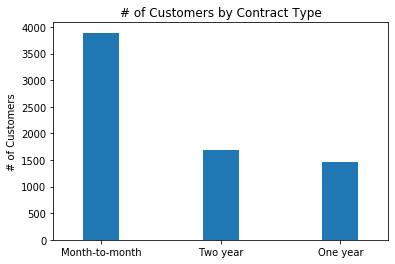

In [74]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

In [75]:
data.groupby(['Contract','Churn'],as_index=False)['gender'].count()

,Contract,Churn,gender
0,Month-to-month,No,2236
1,Month-to-month,Yes,1657
2,One year,No,1297
3,One year,Yes,165
4,Two year,No,1641
5,Two year,Yes,47


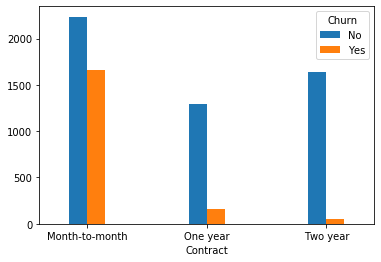

In [76]:



pd.pivot_table(data.groupby(['Contract','Churn'],as_index=False)['gender'].count(), values='gender', index=['Contract'],
                    columns=['Churn']).plot(kind = 'bar',rot = 0, width = 0.3)



___From the above graph we can say that, the customers who  subscribed to Month-to-Month plan are getting churned more compared to the customers who suscribed to one year and Two year plans___

___Relation of Customer Churn with phone service___


Text(0.5, 1.0, '# of Customers who subsribed for phone service')

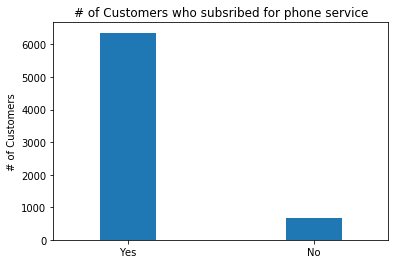

In [77]:
ax = data['PhoneService'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers who subsribed for phone service')

___From the Graph we can interpret that chances of customers who subsribed for phone services are more than those who don't. So its one of the parameters to look at for stopping the churn___

__"Relation of Monthly Charges and Churn"__

Text(0.5, 0, 'Churn')

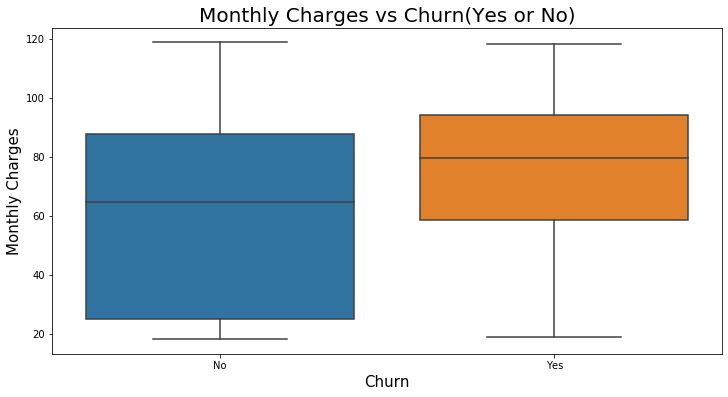

In [78]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
ax.set_title('Monthly Charges vs Churn(Yes or No)', fontsize=20)
ax.set_ylabel('Monthly Charges', fontsize=15)
ax.set_xlabel('Churn', fontsize=15)

Text(0.5, 0, 'Churn')

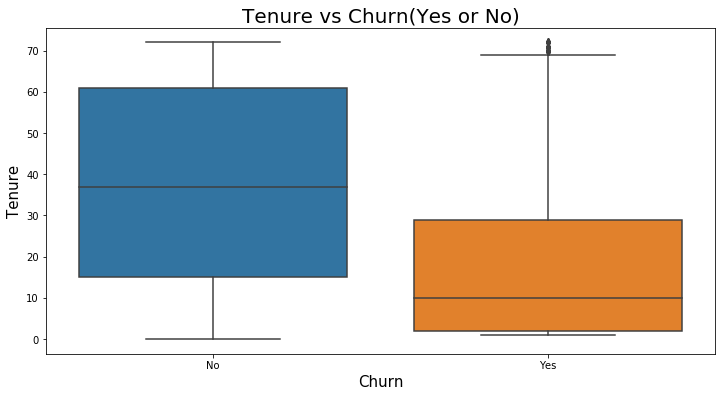

In [79]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='Churn', y='tenure', data=data)
ax.set_title('Tenure vs Churn(Yes or No)', fontsize=20)
ax.set_ylabel('Tenure', fontsize=15)
ax.set_xlabel('Churn', fontsize=15)

___From the Box Plot we can say that customers who have tenure between 10 to 15 months, they are getting  churned so it is useful for the Business to retain customers till at least 15 months___

Text(0.5, 0, 'Churn')

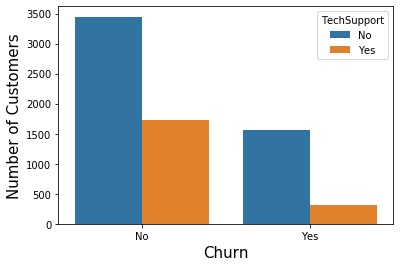

In [80]:
ax = sns.countplot(x="Churn", hue="TechSupport", data=data);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

___Number of Customers who have not subsribed to TechSupport are churning at higher proportion compared to other customers___


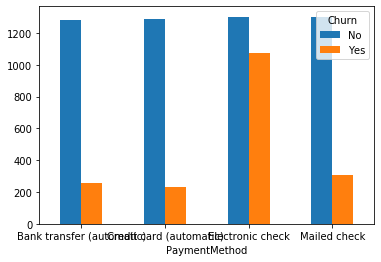

In [81]:
pd.pivot_table(data.groupby(['PaymentMethod','Churn'],as_index=False)['gender'].count(),index=['PaymentMethod'],values='gender',
               columns='Churn').plot(kind = 'bar',rot = 0, width = 0.5)

___from above figure we can say that, Customers opting for Electronic check payment method has highest churning rate___

# Converting Categorical variables into Numeric

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(3), object(17)
memory usage: 1.1+ MB


___Gender___

In [83]:
data['gender']=np.where(data['gender']=='Male',1,0)

In [84]:
data['SeniorCitizen']=np.where(data['SeniorCitizen']=='No',0,1)

In [85]:
data['Partner']=np.where(data['Partner']=='Yes',1,0)

In [86]:
data['Dependents']=np.where(data['Dependents']=='Yes',1,0)

In [87]:
data['PhoneService']=np.where(data['PhoneService']=='Yes',1,0)

In [88]:
data['MultipleLines']=np.where(data['MultipleLines']=='Yes',1,0)

In [89]:
conv=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

for i in conv:
    data[i]=np.where(data[i]=='Yes',1,0)

In [90]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,1,0,0,0,34.0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,No
2,1,0,0,0,2.0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45.0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2.0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [91]:
data=pd.get_dummies(data, columns=["InternetService","Contract", "PaymentMethod"])

In [92]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [93]:
data.dtypes

gender                                       int32
SeniorCitizen                                int32
Partner                                      int32
Dependents                                   int32
tenure                                     float64
PhoneService                                 int32
MultipleLines                                int32
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [94]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [95]:
data=data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn']]

In [96]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn'],
      dtype='object')

In [97]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1.0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,No
1,1,0,0,0,34.0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,No
2,1,0,0,0,2.0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,Yes
3,1,0,0,0,45.0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,No
4,0,0,0,0,2.0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,Yes


# Model Building

# Logistic Regression 

In [98]:
X=data.iloc[:,0:26]
y=data['Churn']


In [99]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [100]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [101]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1.0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34.0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2.0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45.0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2.0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24.0,1,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0
7039,0,0,1,1,72.0,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7040,0,0,1,1,11.0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4.0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [102]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7991483321504613


C:\Users\mange\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


___We are getting accuracy of 0.7991 with basic logistic regression model. We can fine tune this model and check the accuracy___ 

In [103]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

C:\Users\mange\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mange\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mange\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mange\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mange\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

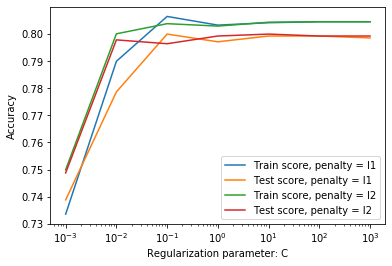

In [104]:
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

__GridSearch Cross-Validation__

In [105]:
grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}
log_grid=LogisticRegression(solver='liblinear')
logreg_cv=GridSearchCV(log_grid,grid)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Users\mange\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.8028044018459354


___From Gridsearch Cross-Validation we can say that Logistic Regression perform better when C=0.1 and Penalty=L1 with accuracy of 0.8028.___

In [106]:
Log_L1=LogisticRegression(C=0.1,penalty='l1',solver='liblinear')
Log_L1.fit(X_train,y_train)
Log_L1.score(X_test,y_test)

0.8005677785663591

In [107]:
scores = cross_val_score(Log_L1, X, y,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.80269695 0.80979418 0.78566359 0.80908446 0.79957356]
Average cross-validation score: 0.80


___Cross-validation score is consistent with avg of 0.80___

__Confusion Matrix__

In [108]:
labels = ['No', 'Yes']
pred_logL1=Log_L1.predict(X_test)
confusion = confusion_matrix(y_test, pred_logL1,labels)
print("Confusion matrix:\n{}".format(confusion))
print ('Accuracy Score :',accuracy_score(y_test, pred_logL1)) 
print ('Report : ')
print (classification_report(y_test, pred_logL1))

Confusion matrix:
[[940 101]
 [180 188]]
Accuracy Score : 0.8005677785663591
Report : 
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1041
         Yes       0.65      0.51      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



[[940 101]
 [180 188]]


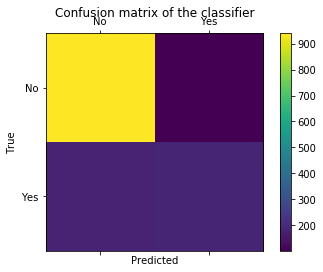

In [109]:
labels = ['No', 'Yes']
cm = confusion_matrix(y_test, pred_logL1, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

___Confusion Matrix dipicts that 939 records which actually No_churn and predicted correctly by our Model___

# Knn Classification

In [110]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))
print('Train Score array',train_score_array)
print('Test Score array',test_score_array)

Train Score array [0.9973375931842385, 0.8635072772452964, 0.8599574014909478, 0.8356407525736599, 0.8313809016684416, 0.8260560880369187, 0.8221512247071352, 0.8182463613773517, 0.8139865104721334, 0.8136315228966986, 0.8072417465388712, 0.8125665601703941, 0.8084842030528931, 0.8120340788072418, 0.8067092651757188, 0.8107916222932198, 0.8036918707845225, 0.8083067092651757, 0.8047568335108272]
Test Score array [0.7139815471965933, 0.7416607523066004, 0.7437899219304471, 0.7473385379701917, 0.7537260468417317, 0.7643718949609652, 0.7693399574166075, 0.7707594038325053, 0.7771469127040455, 0.7764371894960965, 0.772888573456352, 0.7721788502484032, 0.7757274662881476, 0.7792760823278921, 0.7806955287437899, 0.7856635911994322, 0.7814052519517388, 0.7842441447835344, 0.7778566359119943]


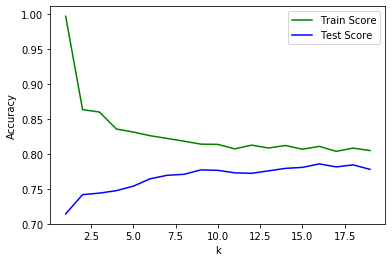

In [111]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [112]:
knn = KNeighborsClassifier(17)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8037
test score: 0.7814


In [113]:
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print('Cross validation score for knn',scores)
print(scores.mean())

Cross validation score for knn [0.77004968 0.78708304 0.77004968 0.78211498 0.78749112]
0.7793576979746911


___Knn algorithm gives maximum accuracy with k value of 17 which is nearly equal to 0.790, After that score goes on decreasing.___

# Support Vector Machine

In [131]:
#Linear_svc = SVC(kernel='rbf', gamma=0.01,C=10)
#Linear_svc.fit(X_train,y_train)
#Linear_svc.score(X_test,y_test)

param_grid = {'C':[1,10,100],'gamma':[1,0.1,0.01], 'kernel':['linear','rbf','poly']}
grid_SVC = GridSearchCV(SVC(),param_grid)
grid_SVC.fit(X_train,y_train)
grid_SVC.best_params_


C:\Users\mange\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}